In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
data.shape

(800, 22)

In [6]:
data.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
data['age'] = data['age'].astype(int)

In [9]:
for col in data.columns:
  numerical_features = ['ID', 'age', 'result']
  if col not in numerical_features:
    print(col, data[col].unique())
    print("-"*50)


A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [10]:
data = data.drop(columns=['ID','age_desc'])

In [11]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [12]:
data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [13]:
mapping = {
    "Viet Nam":"Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"

}

data['contry_of_res'] = data['contry_of_res'].replace(mapping)

In [14]:
data['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [15]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [16]:
sns.set_theme(style='whitegrid')


Mean:  27.96375
Median:  24.0


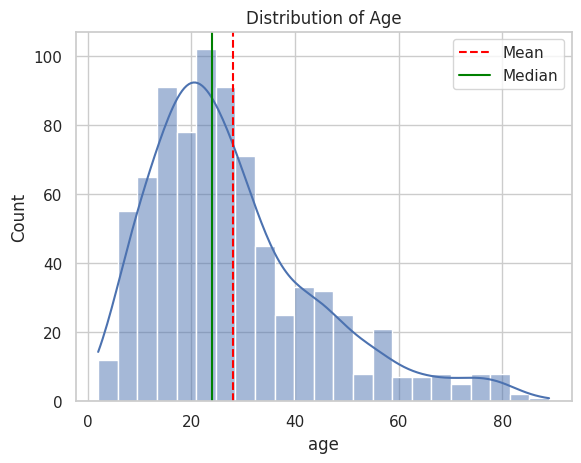

In [17]:
sns.histplot(data['age'],kde=True)
plt.title('Distribution of Age')

age_median = data['age'].median()
age_mean = data['age'].mean()

print('Mean: ',age_mean)
print('Median: ', age_median)

plt.axvline(age_mean, color='red',linestyle='--', label='Mean')
plt.axvline(age_median, color='green',linestyle='-', label='Median')

plt.legend()
plt.show()

Mean:  8.537303106501248
Median:  9.605299308


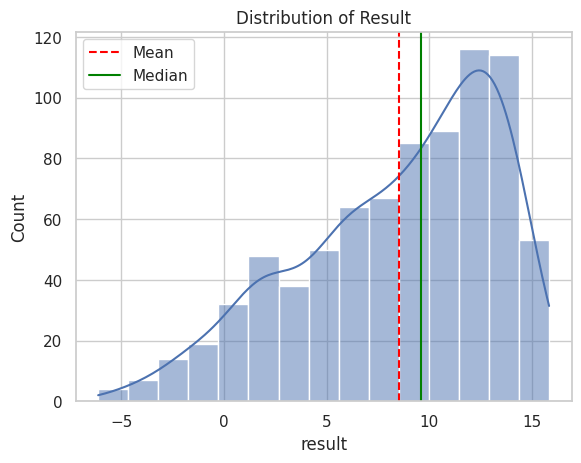

In [18]:
sns.histplot(data['result'],kde=True)
plt.title('Distribution of Result')

result_median = data['result'].median()
result_mean = data['result'].mean()

print('Mean: ',result_mean)
print('Median: ', result_median)

plt.axvline(result_mean, color='red',linestyle='--', label='Mean')
plt.axvline(result_median, color='green',linestyle='-', label='Median')

plt.legend()
plt.show()

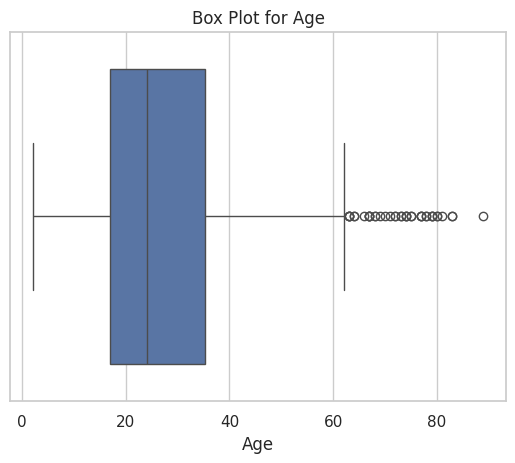

In [19]:
sns.boxplot(x=data['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

In [20]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

In [21]:
len(age_outliers)

39

In [22]:
Q1 = data['result'].quantile(0.25)
Q3 = data['result'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = data[(data['result'] < lower_bound) | (data['result'] > upper_bound)]

In [23]:
len(result_outliers)

1

In [24]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

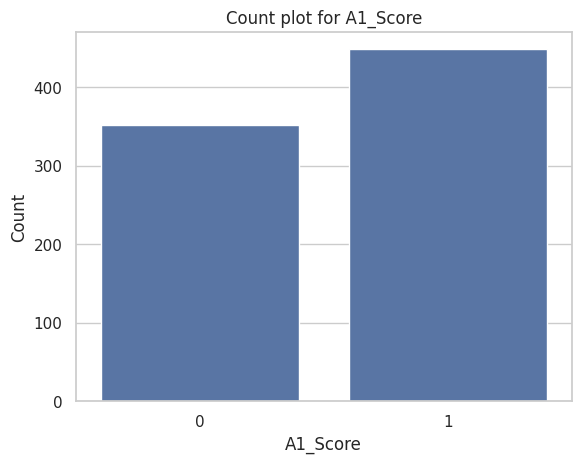

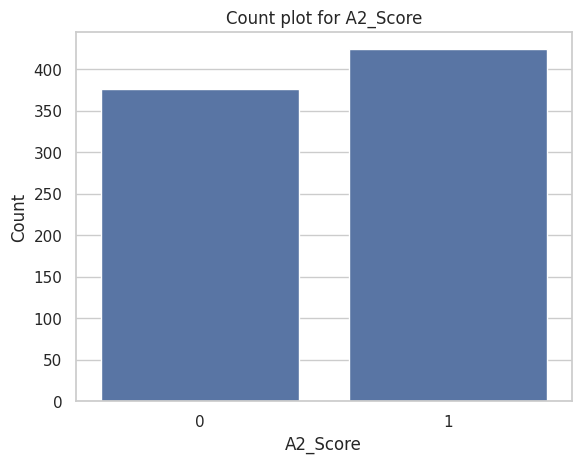

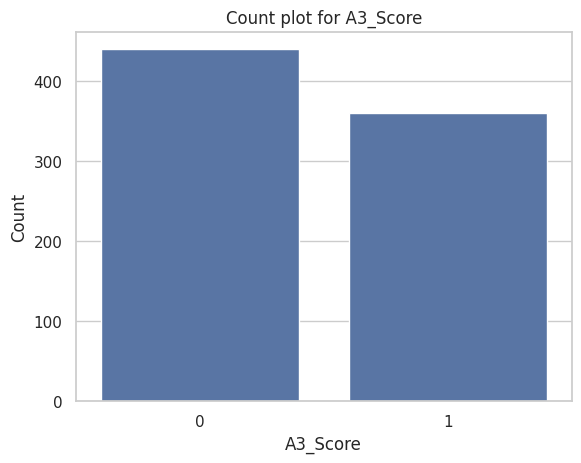

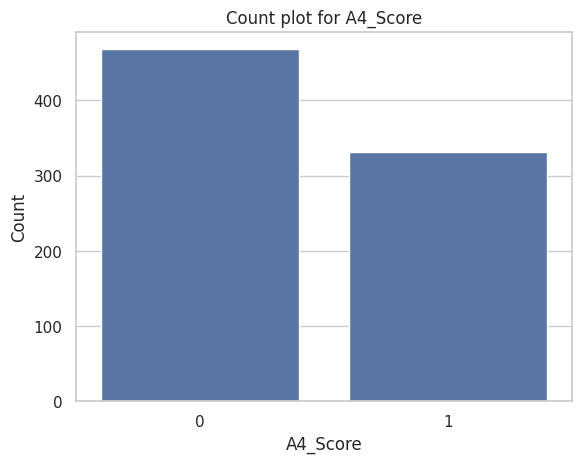

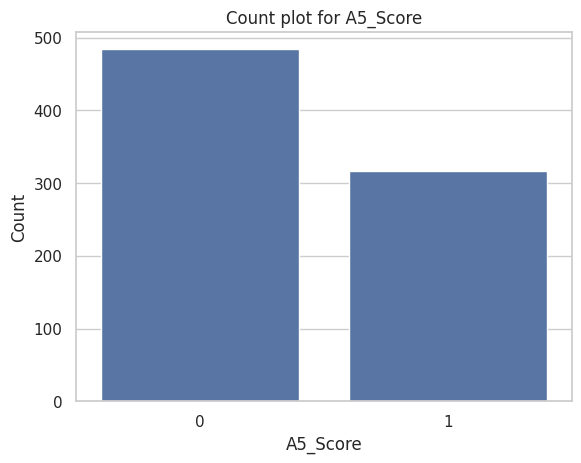

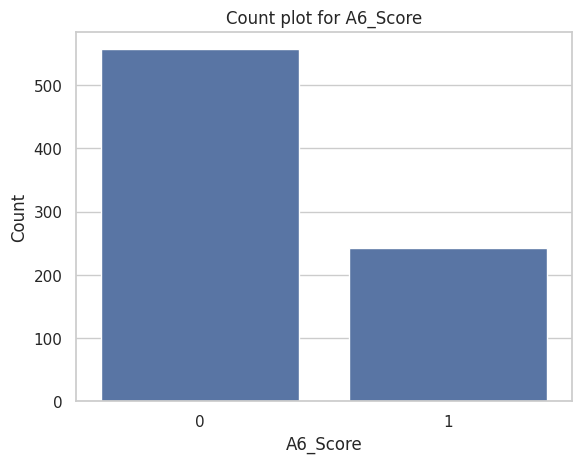

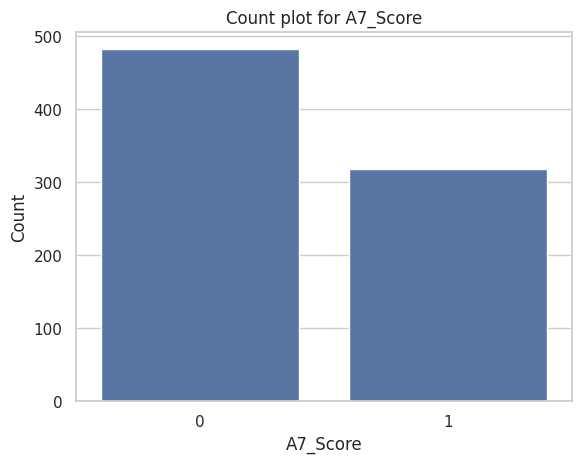

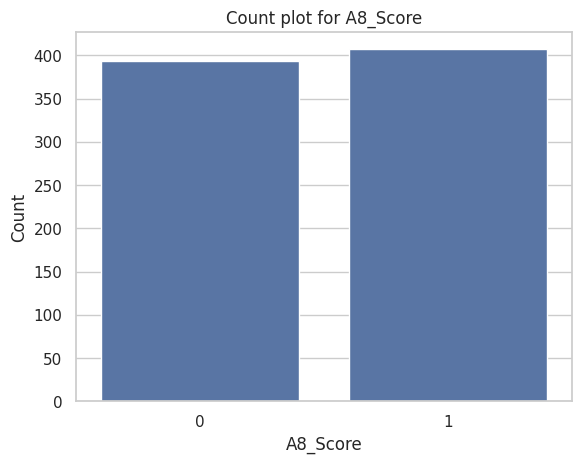

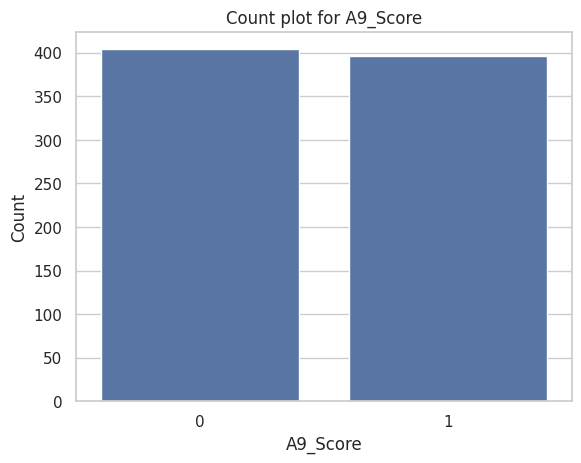

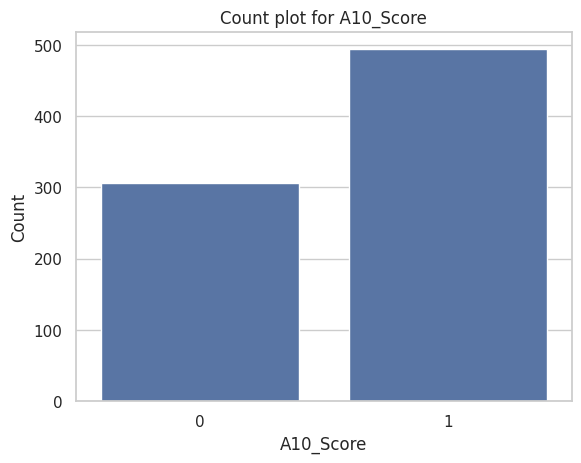

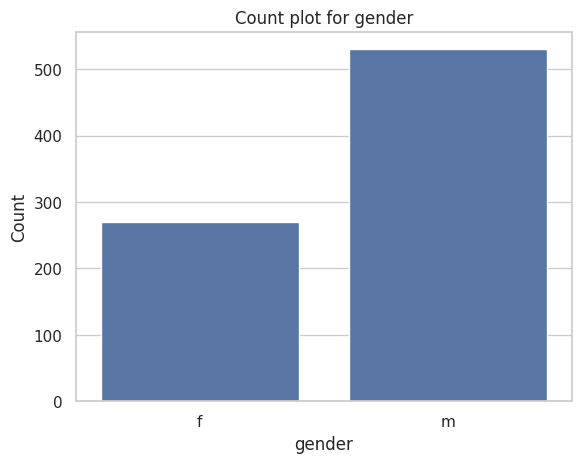

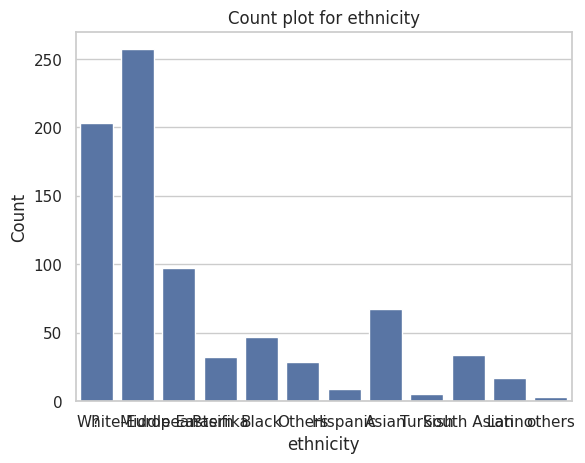

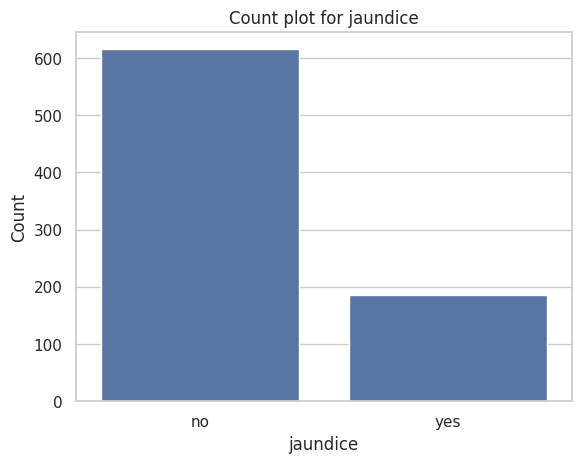

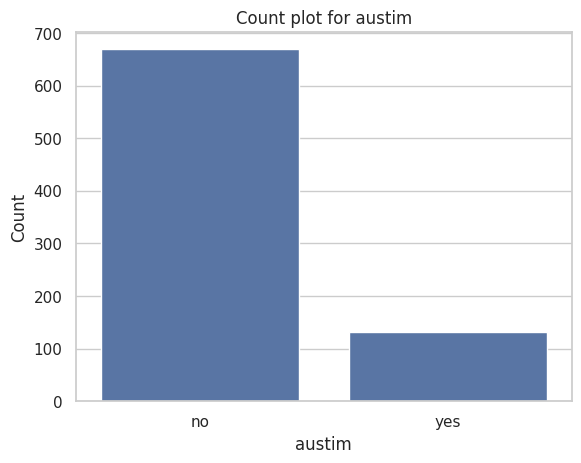

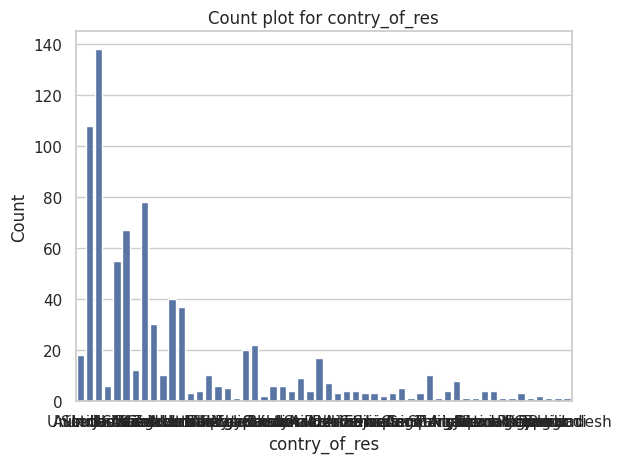

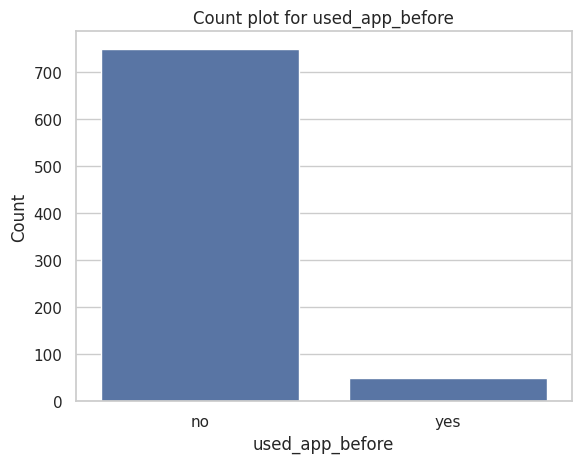

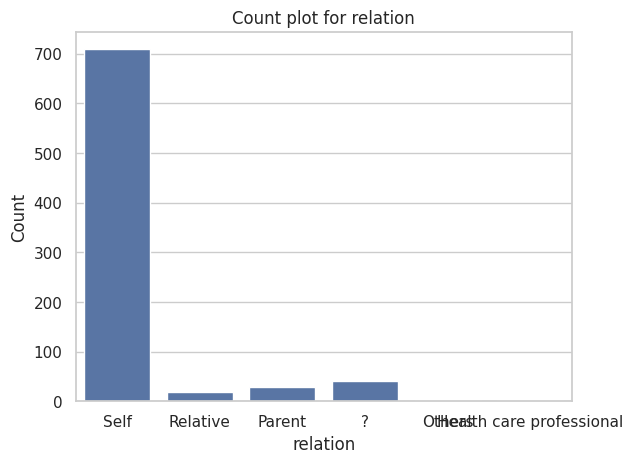

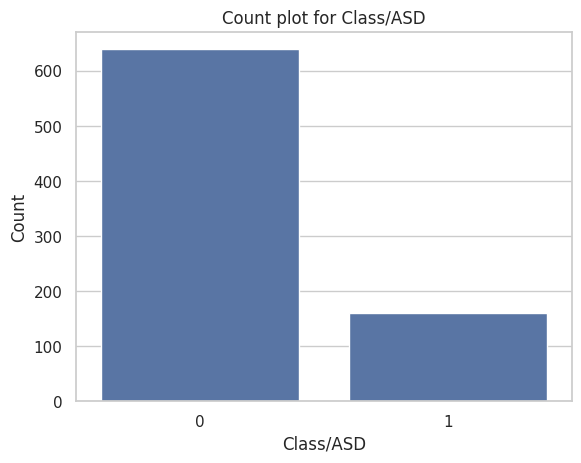

In [25]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender','ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'Class/ASD']

for col in categorical_columns:
  sns.countplot(x=data[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()




In [26]:
data['ethnicity'] = data['ethnicity'].replace({'?':'Others','others':'Others'})


In [27]:
data['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [28]:
data['relation'] = data['relation'].replace(
    {'?':'Others',
     'Relative':'Others',
     'Parent':'Others',
     'Health care professional':'Others'}
)

In [29]:
data['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [30]:
object_columns = data.select_dtypes(include=['object']).columns

In [31]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [32]:
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  data[column] = label_encoder.fit_transform(data[column])
  encoders[column] = label_encoder

with open('encoders.pkl','wb') as f:
  pickle.dump(encoders,f)

In [33]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [34]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


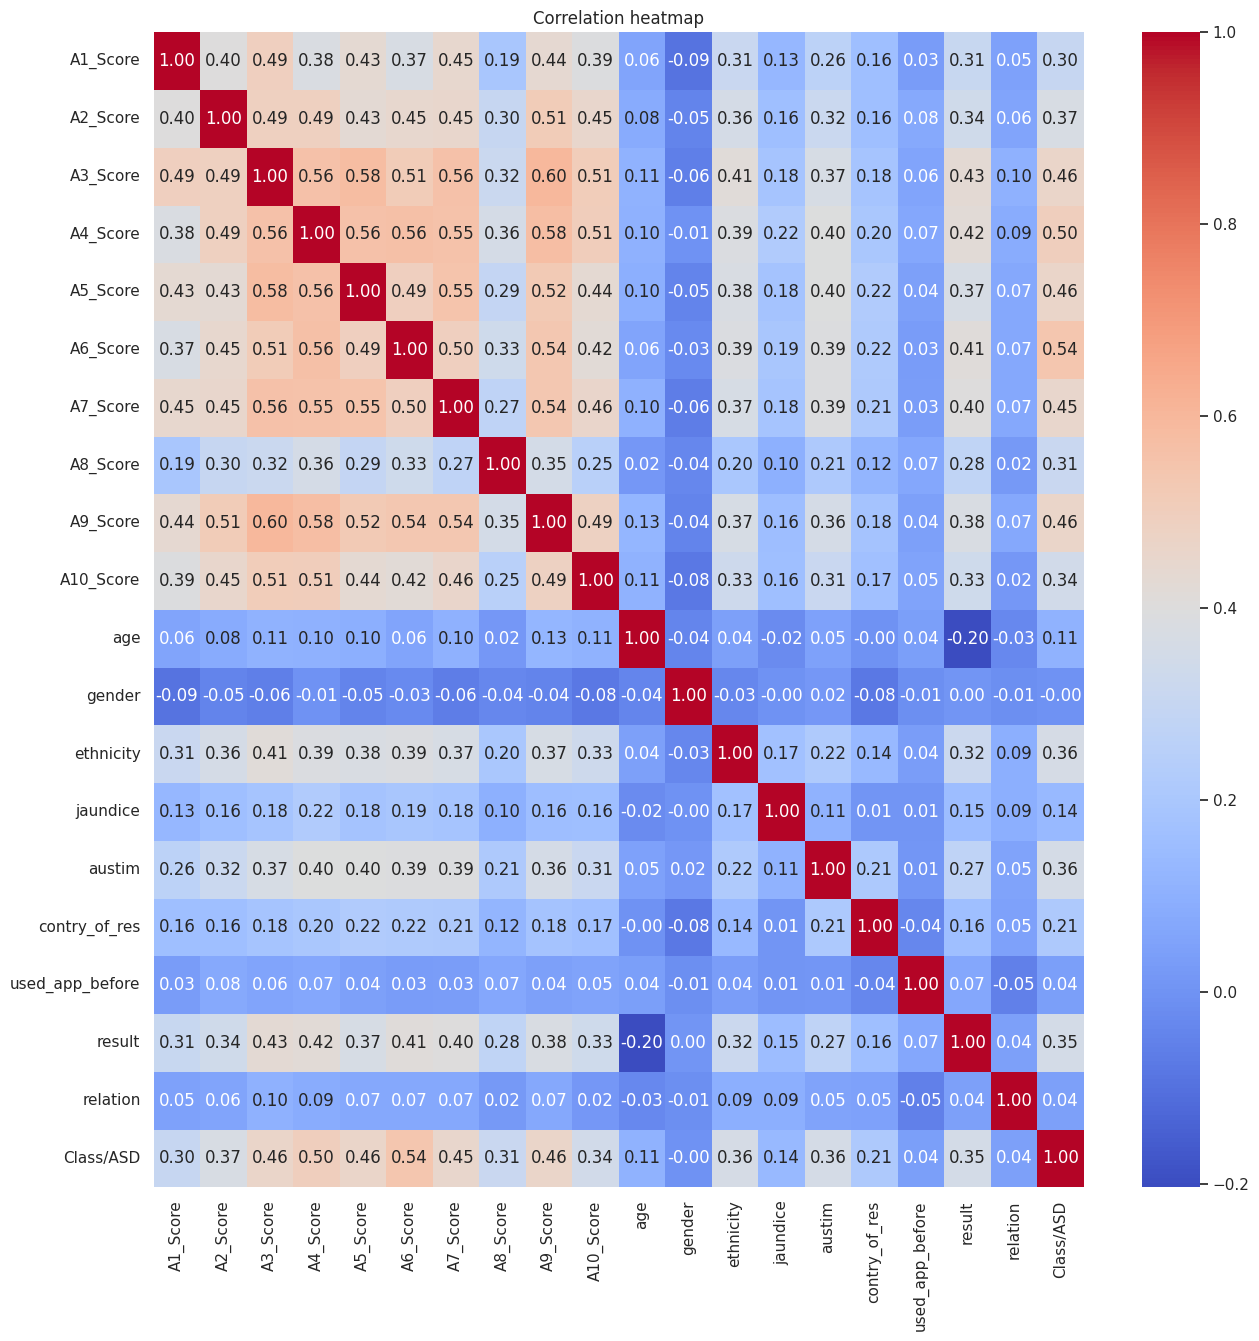

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

In [36]:
def replace_outliers_with_median(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = data[column].median()

  data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return data

In [37]:
data = replace_outliers_with_median(data,'age')

data = replace_outliers_with_median(data, 'result')

In [38]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [39]:
data.shape

(800, 20)

In [40]:
X = data.drop(columns=['Class/ASD'])
Y = data['Class/ASD']

In [41]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [42]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [44]:
print(Y_train)
print(Y_test)
print(X_train)
print(X_test)

264    1
615    0
329    0
342    0
394    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: Class/ASD, Length: 640, dtype: int64
696    0
667    0
63     0
533    0
66     0
      ..
589    0
798    0
744    0
513    0
670    0
Name: Class/ASD, Length: 160, dtype: int64
     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
264         1         1         1         1         1         1         1   
615         0         0         0         0         0         0         1   
329         1         0         0         0         0         0         0   
342         0         0         0         0         0         0         0   
394         1         1         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
71          0         1         0         0         0         0         0   
106         0         0         0         1         0         0         0   
270         1         0

In [45]:
smote = SMOTE(random_state=42)


In [46]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [47]:
print(Y_train_smote)

0       1
1       0
2       0
3       0
4       0
       ..
1025    1
1026    1
1027    1
1028    1
1029    1
Name: Class/ASD, Length: 1030, dtype: int64


In [48]:
print(Y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [52]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBosst": XGBClassifier(random_state=42)
}

In [54]:
cv_scores = {}

for model_name, model in models.items():
  print(f"Training {model_name} with defaul parameters....")
  scores = cross_val_score(model,X_train_smote, Y_train_smote, cv=5,scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)



Training Decision Tree with defaul parameters....
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with defaul parameters....
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBosst with defaul parameters....
XGBosst Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [55]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBosst': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [60]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [63]:
param_grid_dt = {
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grin_xgb = {
    "n_estimators":[50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]

}

In [65]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grin_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [66]:
random_search_dt.fit(X_train_smote,Y_train_smote)
random_search_rf.fit(X_train_smote,Y_train_smote)
random_search_xgb.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [67]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
0.8699029126213592
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
0.9271844660194175
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.9116504854368932


In [68]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_


if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_


if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

In [69]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.93


In [70]:
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [73]:
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n ", accuracy_score(Y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print("Classification Report:\n ", classification_report(Y_test, y_test_pred))

Accuracy score:
  0.81875
Confusion Matrix:
 [[108  16]
 [ 13  23]]
Classification Report:
                precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

